# Imports

In [2]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

physionet_folder = 'physionet_apnea'

# Loading Data

In [3]:
df = pd.read_csv('./'+physionet_folder+'/a01.csv',header=None)

# Visuals

In [4]:
# get 1 ECG signal of each category for plotting
no_apnea = df.iloc[0].to_numpy()
no_apnea=no_apnea[1:]

apnea = df.iloc[474].to_numpy() #  487
apnea=apnea[1:]

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,5991,5992,5993,5994,5995,5996,5997,5998,5999,6000
0,0.0,-0.060,-0.065,-0.060,-0.075,-0.065,-0.070,-0.070,-0.090,-0.080,...,-0.105,-0.105,-0.080,-0.070,-0.010,-0.030,0.015,0.040,0.070,0.090
1,0.0,0.140,0.170,0.215,0.245,0.250,0.240,0.240,0.255,0.230,...,-0.085,-0.085,-0.080,-0.090,-0.095,-0.100,-0.085,-0.110,-0.095,-0.100
2,0.0,-0.100,-0.105,-0.105,-0.125,-0.110,-0.110,-0.100,-0.130,-0.110,...,-0.060,-0.060,-0.035,-0.030,-0.045,-0.050,-0.025,-0.040,-0.055,-0.110
3,0.0,-0.060,-0.085,-0.085,-0.085,-0.090,-0.145,-0.065,-0.130,-0.095,...,0.010,0.000,0.010,0.000,-0.010,-0.040,-0.025,-0.010,0.030,0.020
4,0.0,0.025,0.030,0.100,0.115,0.095,0.165,0.185,0.085,0.065,...,-0.115,-0.090,-0.080,-0.060,-0.030,0.000,0.030,0.050,0.070,0.115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,1.0,-0.150,-0.165,-0.195,0.065,0.770,1.285,0.685,-0.300,-0.705,...,-0.030,-0.045,-0.030,-0.045,-0.035,-0.055,-0.050,-0.045,-0.045,-0.050
485,1.0,-0.045,-0.040,-0.055,-0.055,-0.060,-0.055,-0.055,-0.045,-0.070,...,-0.060,-0.060,-0.140,-0.210,-0.185,-0.200,-0.175,-0.225,0.020,0.870
486,1.0,1.740,1.130,-0.455,-0.710,-0.355,-0.135,-0.120,-0.115,-0.100,...,-0.020,-0.020,-0.035,-0.040,-0.045,-0.050,-0.030,-0.055,-0.055,-0.060
487,1.0,-0.040,-0.080,-0.060,-0.090,-0.060,-0.050,-0.065,-0.055,-0.080,...,-0.045,-0.050,-0.050,-0.055,-0.040,-0.070,-0.060,-0.060,-0.050,-0.050


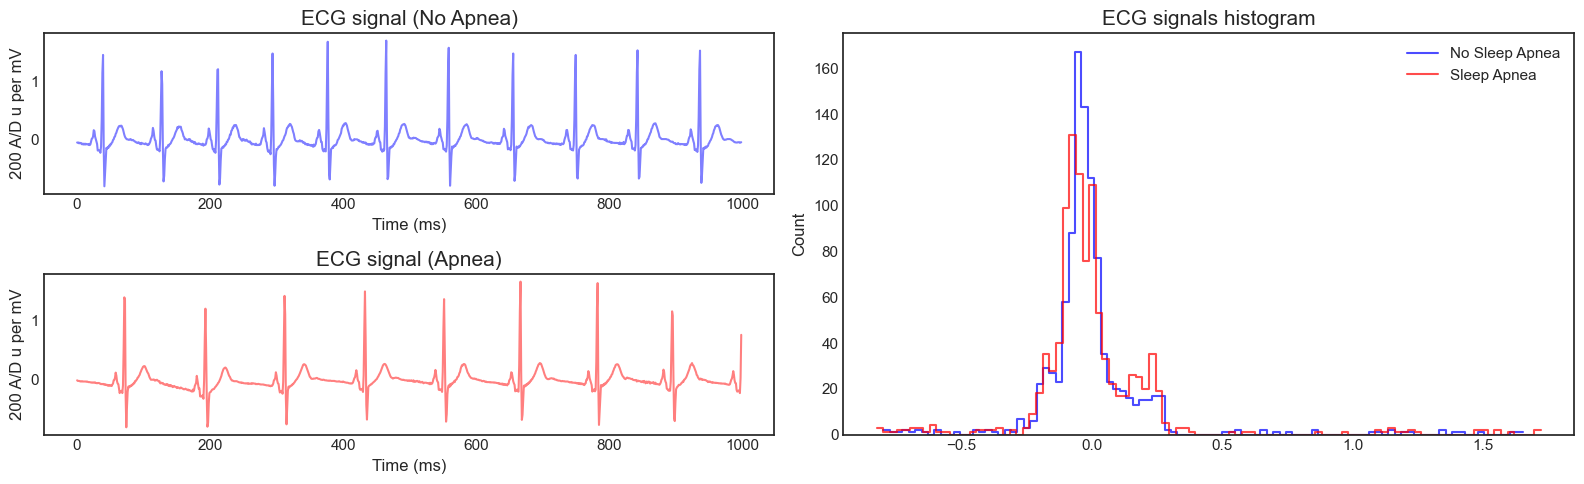

In [34]:
fig = plt.figure(figsize=(16, 5))

fig.add_subplot(1, 2, 2)   #top and bottom left - histogram

# plt.style.use("seaborn-v0_8-white")
plt.title( 'ECG signals histogram', fontsize = 15)

# sns.set(style='darkgrid')
sns.histplot(data=apnea[0:1000], label='No Sleep Apnea', fill=False, color= 'blue', alpha  = .7, bins=100, element="step")
sns.histplot(data=no_apnea[0:1000], label='Sleep Apnea', fill=False, color= 'red', alpha  = .7,  bins=100, element="step")
plt.legend()

# plt.savefig('./plots/ecgHist.jpg', bbox_inches='tight')

fig.add_subplot(2, 2, 1)   #top right - ECG signal (No Apnea)

plt.title( 'ECG signal (No Apnea)', fontsize = 15)
sns.lineplot(data=no_apnea[0:1000], label='No Sleep Apnea', color= 'blue', alpha  = .5)
plt.xlabel('Time (ms)')
plt.ylabel('200 A/D u per mV')
plt.legend([],[], frameon=False)    # remove legend

fig.add_subplot(2, 2, 3)   #bottom right - ECG signal (Apnea)

plt.title( 'ECG signal (Apnea)', fontsize = 15)
sns.lineplot(data=apnea[0:1000], label='Sleep Apnea', color= 'red', alpha  = .5)
plt.xlabel('Time (ms)')
plt.ylabel('200 A/D u per mV')
plt.legend([],[], frameon=False)

plt.tight_layout()
plt.savefig('./plots/ecgSignalsKDE10s.jpg', bbox_inches='tight')
plt.show()


Layered signals

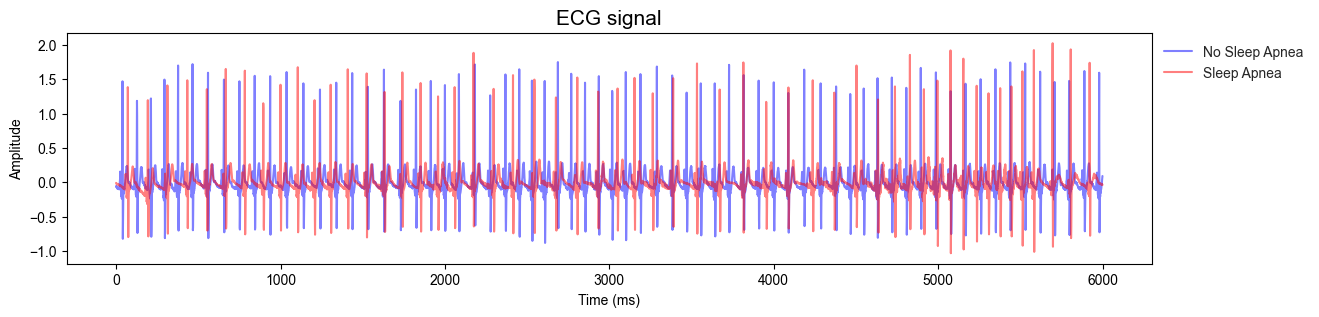

In [6]:
# Both signals
fig=plt.figure(figsize=(14, 3))
plt.title( 'ECG signal', fontsize = 15)

# sns.set_palette("seismic")

plt.style.use("seaborn-v0_8-white")

# sns.despine(left=True, bottom=True)
# sns.set_style("whitegrid")

ax = sns.lineplot(data=no_apnea, label='No Sleep Apnea', color= 'blue', alpha  = .5)
sns.lineplot(data=apnea, label='Sleep Apnea', color= 'red', alpha  = .5)


#sns.lineplot(data=df[488], label=0)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

# plt.savefig('./plots/ecgLayered.jpg', bbox_inches='tight')  #image names in camelCase (snake_case causes problems in Latex)
plt.show()

Single ECG signal - No apnea

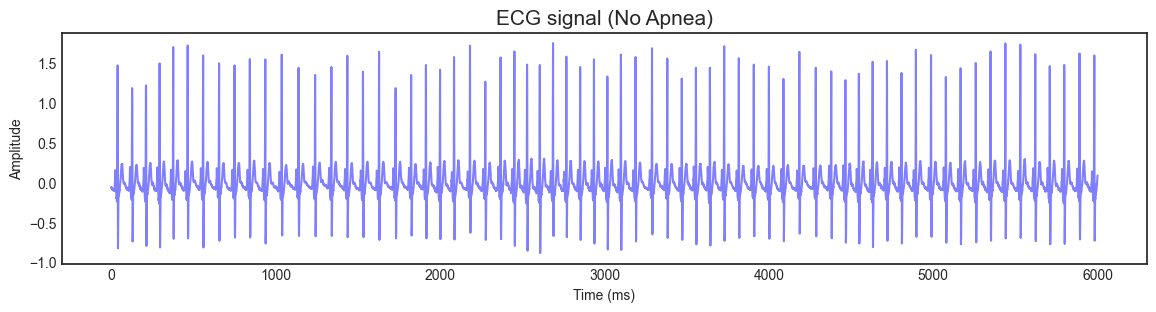

In [7]:
# single signal
fig=plt.figure(figsize=(14, 3))
plt.style.use("seaborn-v0_8-white")
plt.title( 'ECG signal (No Apnea)', fontsize = 15)

sns.set(style='darkgrid')
sns.lineplot(data=no_apnea, label='No Sleep Apnea', color= 'blue', alpha  = .5)

plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.legend([],[], frameon=False)    # remove legend

# plt.savefig('./plots/ecgNoApnea.jpg', bbox_inches='tight')
plt.show()

Single ECG signal - Apnea

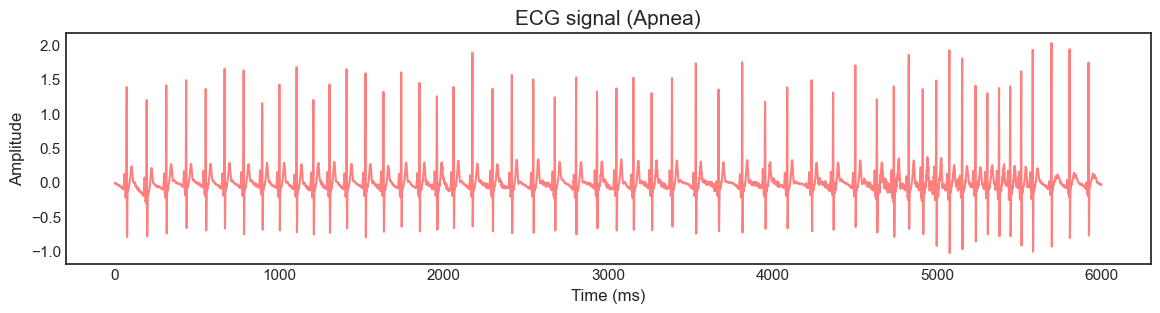

In [8]:
# 474
# apnea = df.iloc[474].to_numpy() 
# apnea=apnea[1:]

# single signal
fig=plt.figure(figsize=(14, 3))
plt.style.use("seaborn-v0_8-white")
plt.title( 'ECG signal (Apnea)', fontsize = 15)

sns.lineplot(data=apnea, label='Sleep Apnea', color= 'red', alpha  = .5)

plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.legend([],[], frameon=False)

# plt.savefig('./plots/ecgApnea.jpg', bbox_inches='tight')
plt.show()

kde

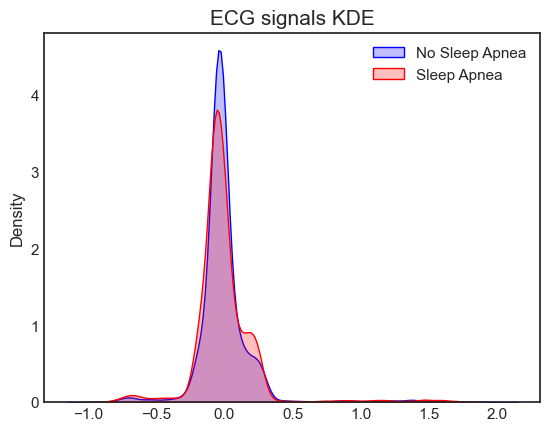

In [9]:
# Kernel density estimation plot (KDE) (probability distribution)

fig=plt.figure()
plt.style.use("seaborn-v0_8-white")
plt.title( 'ECG signals KDE', fontsize = 15)

sns.set(style='darkgrid')
sns.kdeplot(data=apnea, label='No Sleep Apnea', fill=True, color= 'blue')
sns.kdeplot(data=no_apnea, label='Sleep Apnea', fill=True, color= 'red')
plt.legend()

# plt.savefig('./plots/ecgKDE.jpg', bbox_inches='tight')
plt.show()

Histogram

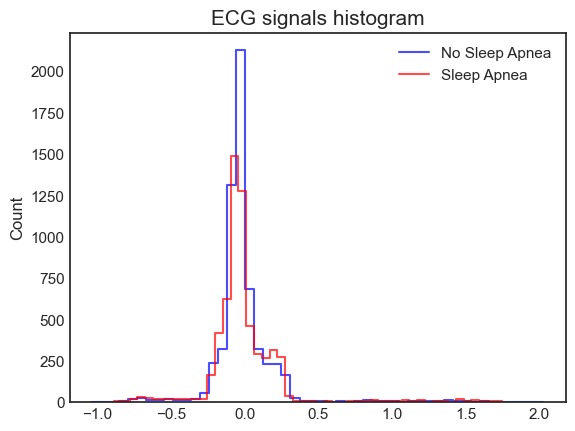

In [10]:
# histogram plot

fig=plt.figure()
plt.style.use("seaborn-v0_8-white")
plt.title( 'ECG signals histogram', fontsize = 15)

sns.set(style='darkgrid')
sns.histplot(data=apnea, label='No Sleep Apnea', fill=False, color= 'blue', alpha  = .7, bins= 50, element="step")
sns.histplot(data=no_apnea, label='Sleep Apnea', fill=False, color= 'red', alpha  = .7, bins= 50, element="step")
plt.legend()

# plt.savefig('./plots/ecgHist.jpg', bbox_inches='tight')
plt.show()

Histogram poly

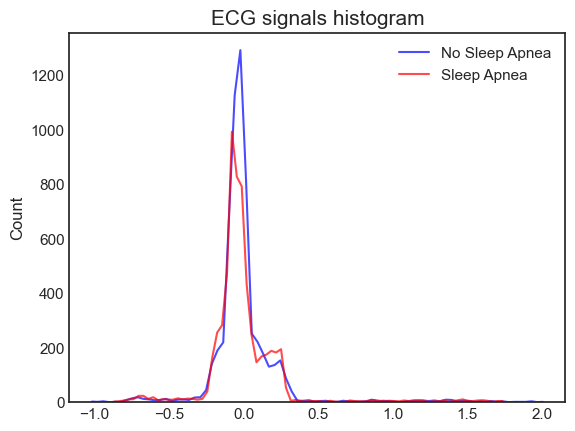

In [11]:
# histogram plot

fig=plt.figure()
plt.style.use("seaborn-v0_8-white")
plt.title( 'ECG signals histogram', fontsize = 15)

sns.set(style='darkgrid')
sns.histplot(data=apnea, label='No Sleep Apnea', fill=False, color= 'blue', alpha  = .7, bins= 80, element="poly")
sns.histplot(data=no_apnea, label='Sleep Apnea', fill=False, color= 'red', alpha  = .7, bins= 80, element="poly")
plt.legend()

# plt.savefig('./plots/ecgKDE.jpg', bbox_inches='tight')
plt.show()

Histogram dodge

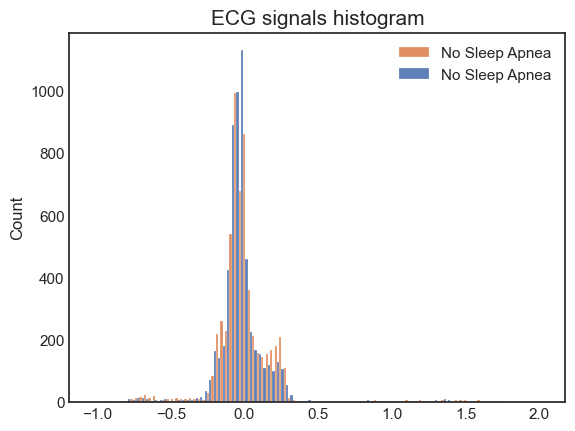

In [12]:
# histogram plot

fig=plt.figure()
plt.style.use("seaborn-v0_8-white")
plt.title( 'ECG signals histogram', fontsize = 15)

sns.set(style='darkgrid')
sns.histplot(data=[apnea,no_apnea], label='No Sleep Apnea', fill=True, color= ['blue','red'], alpha  = .9, multiple="dodge", bins = 100)
plt.legend()

# plt.savefig('./plots/ecgKDE.jpg', bbox_inches='tight')
plt.show()

display

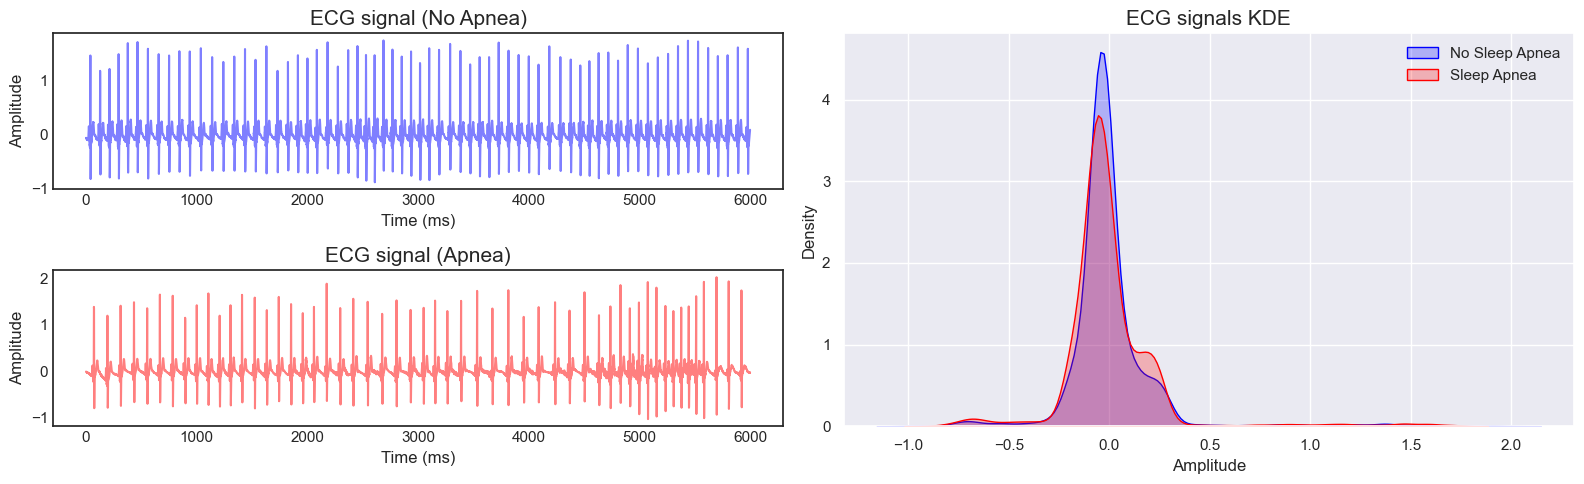

In [13]:
fig = plt.figure(figsize=(16, 5))

fig.add_subplot(1, 2, 2)   #top and bottom left - histogram

plt.style.use("seaborn-v0_8-white")
plt.title( 'ECG signals KDE', fontsize = 15)

sns.kdeplot(data=apnea, label='No Sleep Apnea', fill=True, color= 'blue', common_norm= True)
sns.kdeplot(data=no_apnea, label='Sleep Apnea', fill=True, color= 'red', common_norm= True)
plt.legend()
plt.xlabel('Amplitude')

fig.add_subplot(2, 2, 1)   #top right - ECG signal (No Apnea)

plt.title( 'ECG signal (No Apnea)', fontsize = 15)
sns.lineplot(data=no_apnea, label='No Sleep Apnea', color= 'blue', alpha  = .5)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.legend([],[], frameon=False)    # remove legend

fig.add_subplot(2, 2, 3)   #bottom right - ECG signal (Apnea)

plt.title( 'ECG signal (Apnea)', fontsize = 15)
sns.lineplot(data=apnea, label='Sleep Apnea', color= 'red', alpha  = .5)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.legend([],[], frameon=False)

plt.tight_layout()
# plt.savefig('./plots/ecgSignalsKDE.jpg', bbox_inches='tight')
plt.show()